About Dataset
Context

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.
Content

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:
Acknowledgements

The original dataset can be found here. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.

We offer a comprehensive study of this corpus in the following paper. This work presents a number of statistics, studies and baseline results for several machine learning methods.

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.
Inspiratio

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data/spam.csv',encoding='latin1')

In [4]:
import chardet

# Detect encoding
with open('data/spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print("Detected encoding:", result['encoding'])

Detected encoding: Windows-1252


In [3]:
df.to_csv("data/demo.csv")

In [99]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [100]:
df.shape

(5572, 5)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


=> Droping missing values col

In [102]:
df.dropna(axis=1,inplace=True)

In [103]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


=> Renaming the cols


In [104]:
df.rename(columns={'v1':'target','v2':'sms'},inplace=True)

In [105]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.target = encoder.fit_transform(df.target)
 

In [106]:
##Checking missing values
df.isna().sum()

target    0
sms       0
dtype: int64

In [107]:
df.duplicated().sum()

np.int64(403)

In [108]:
## here we will drop duplicates bcoz we know that the duplicated value will affect the text classification by increasing its frequency in dataset
df.drop_duplicates(keep='first',inplace=True)

In [109]:
df.shape

(5169, 2)

# Eda of Dataset

In [110]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

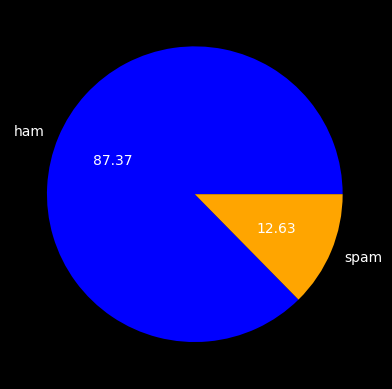

In [111]:
##Visusalize with pie chart
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f',colors=['blue','orange'])
plt.show()

#### Data is too imblacnce

In [112]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/shiv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/shiv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
df['len_characters'] = df['sms'].apply(len)

In [114]:
df.head()

,target,sms,len_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [115]:
#num of words
df['no_of_words']= df['sms'].apply(lambda x: len(nltk.word_tokenize(x)))

In [116]:
df.head()

,target,sms,len_characters,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [117]:
#num of words
df['no_of_sentences']= df['sms'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [118]:
df.head()

,target,sms,len_characters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


statistical info of new cols

In [119]:
df[['len_characters','no_of_words','no_of_sentences']].describe()

,len_characters,no_of_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [120]:
#Ham 
df[df['target']==0][['len_characters','no_of_words','no_of_sentences']].describe()

,len_characters,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [121]:
#spam 
df[df['target']==1][['len_characters','no_of_words','no_of_sentences']].describe()

,len_characters,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='len_characters', ylabel='Count'>

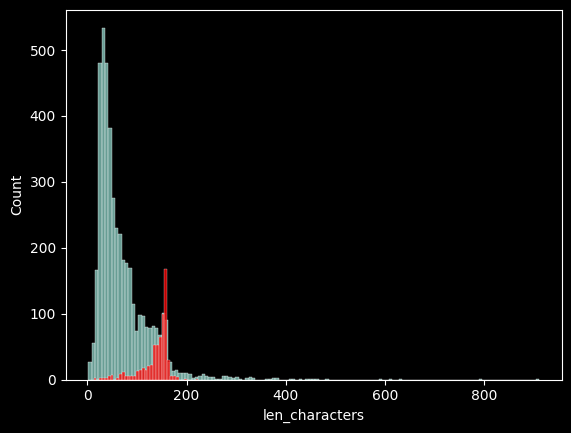

In [122]:
sns.histplot(df[df['target']==0]['len_characters'])
sns.histplot(df[df['target']==1]['len_characters'],color='red')

<Axes: xlabel='no_of_words', ylabel='Count'>

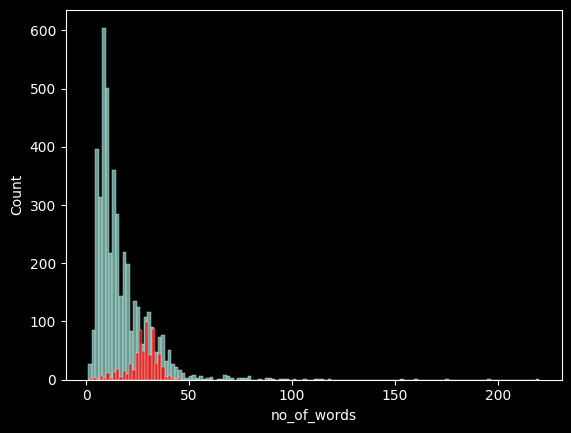

In [123]:
sns.histplot(df[df['target']==0]['no_of_words'])
sns.histplot(df[df['target']==1]['no_of_words'],color='red')

<Axes: xlabel='no_of_sentences', ylabel='Count'>

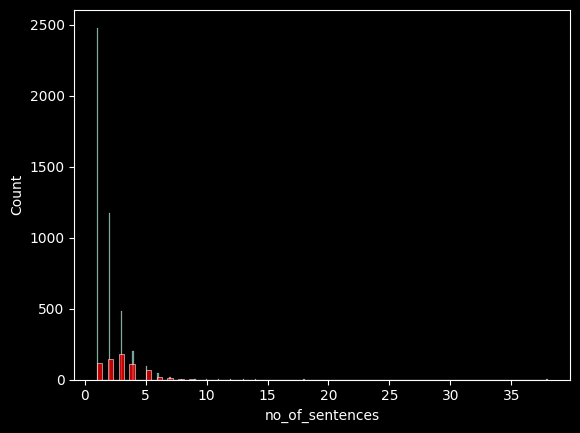

In [124]:
sns.histplot(df[df['target']==0]['no_of_sentences'])
sns.histplot(df[df['target']==1]['no_of_sentences'],color='red')

<Axes: >

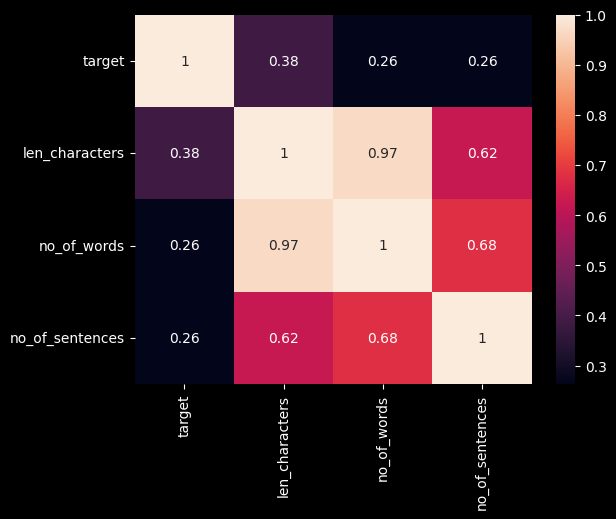

In [125]:
sns.heatmap(df[['target','len_characters','no_of_words','no_of_sentences']].corr(),annot=True)


# Taking len_characters bcoz its highly related

# Doing Data Preprocessig

In [126]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import PorterStemmer


In [139]:
def transform_text(text:str,ps=PorterStemmer()):
    text = text.lower()
    text = nltk.word_tokenize(text)
    res=[]
    for i in text:
        if i.isalpha():
            res.append(i)
            
    text = res[:]
    res.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in punctuation:
            res.append(ps.stem(i))
        

    return " ".join(res)

In [140]:

transform_text(df.sms[0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [141]:
df['transformed_txt'] = df['sms'].apply(transform_text)

In [142]:
df.head()

,target,sms,len_characters,no_of_words,no_of_sentences,transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Now creating wordcloud

In [143]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [144]:
spam_wc = wc.generate(df[df['target']==1]['transformed_txt'].str.cat(sep=" "))

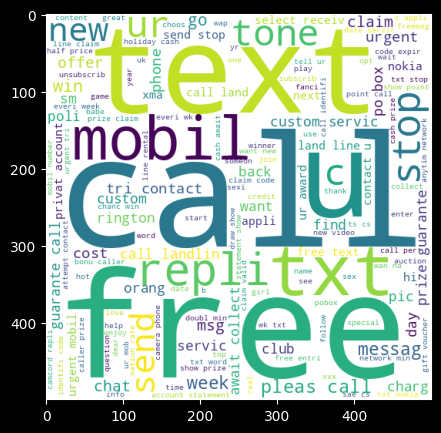

In [151]:
plt.figure(figsize=(5,5))
plt.imshow(spam_wc)

In [148]:
ham_wc = wc.generate(df[df['target']==1]['transformed_txt'].str.cat(sep=" "))

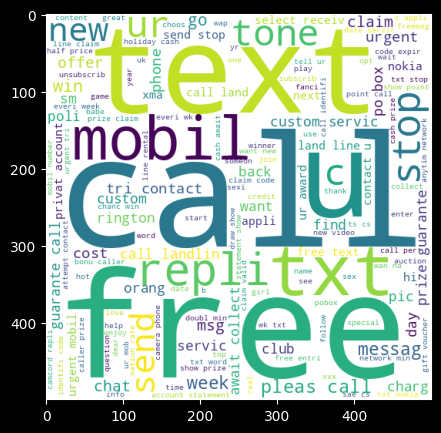

In [150]:
plt.figure(figsize=(5,5))
plt.imshow(ham_wc)

## Model Building

In [152]:
#converting txt in vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer()

In [155]:
x = tf_vectorizer.fit_transform(df['transformed_txt']).toarray()
x.shape

(5169, 5849)

In [156]:
y = df['target']

In [157]:
y.shape

(5169,)

In [172]:
from sklearn.model_selection import train_test_split


In [173]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=43)

In [174]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4135, 5849), (1034, 5849), (4135,), (1034,))

In [175]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [182]:
models ={
    'gnb': GaussianNB(),
'mmb': MultinomialNB(),
'bnb': BernoulliNB()
}

In [ ]:
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"Accuracy score of {model_name}: {accuracy_score(y_true=y_test,y_pred=y_pred)}")
    print(f"Confusion matrix of {model_name}: {confusion_matrix(y_true=y_test,y_pred=y_pred)}")
    print(f"Precision of {model_name}: {precision_score(y_true=y_test,y_pred=y_pred)}")

In [168]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [176]:
y_pred=mnb.predict(x_test)

In [177]:
accuracy_score(y_true=y_test,y_pred=y_pred)

0.9584139264990329

In [178]:
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[895,   0],
       [ 43,  96]])

In [179]:
precision_score(y_true=y_test,y_pred=y_pred)

1.0